# Database visualization

In [22]:
import numpy as np
import sqlite3 as lite
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import os
import sys
#sys.path.append(os.getenv("MASTER_THESIS_RESULTS"))

from utils.db_utils import get_db_absolute_path, insert_data_to_db
from database.queries import QUERY_FULL_RANK_TEST_GROUPED_A

In [8]:
# Setup sqlite connection
database = get_db_absolute_path()
con = lite.connect(database)

### A table

In [9]:
full_rank_test_grouped_a = pd.read_sql_query(QUERY_FULL_RANK_TEST_GROUPED_A, con)
full_rank_test_grouped_a

,test_dataset,training_dataset,environment,distance,device,training_model,keybyte,epoch,additive_method,additive_param_1,additive_param_1_value,additive_param_2,additive_param_2_value,denoising_method,denoising_param_1,denoising_param_1_value,denoising_param_2,denoising_param_2_value,count_term_p,avg_term_p
0,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,40,None,None,NaN,None,NaN,None,None,NaN,None,None,100,773.640000
1,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,50,None,None,NaN,None,NaN,None,None,NaN,None,None,100,732.920000
2,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,183,755.169399
3,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,7,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,210,650.509524
4,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,8,cnn_110,0,65,None,None,NaN,None,NaN,None,None,NaN,None,None,210,602.561905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,6,cnn_110,0,100,Rayleigh,Mode,0.0138,None,NaN,None,None,NaN,None,None,120,495.375000
66,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,8,cnn_110,0,65,Rayleigh,Mode,0.0276,None,NaN,None,None,NaN,None,None,5,759.200000
67,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,9,cnn_110,0,65,Rayleigh,Mode,0.0276,None,NaN,None,None,NaN,None,None,3,1274.666667
68,Wang_2021,Wang_2021 - Cable,office_corridor,15.0,10,cnn_110,0,65,Rayleigh,Mode,0.0276,None,NaN,None,None,NaN,None,None,105,359.190476


## Visualize x=device, y=termination_point, hue=additive_noise

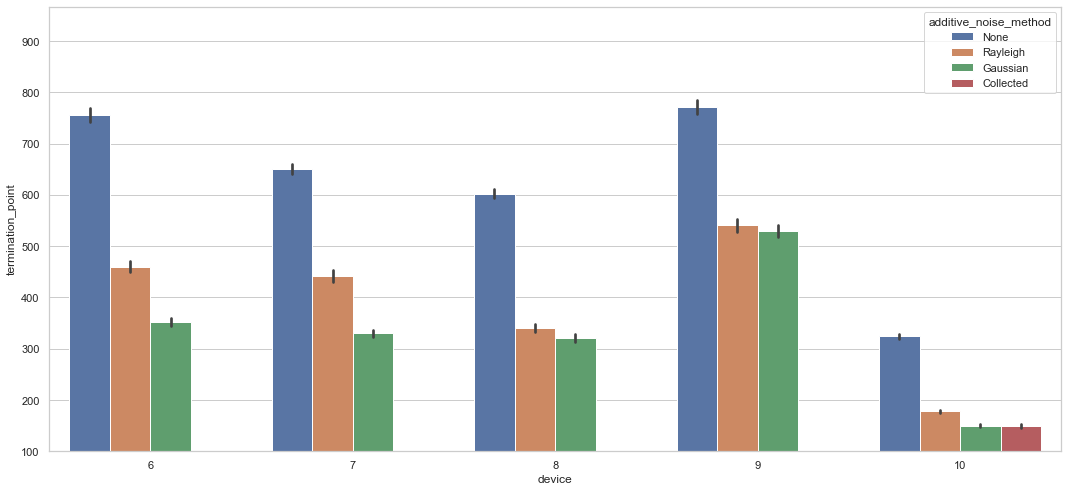

In [142]:
query = """
select
    device, 
    epoch, 
    additive_noise_method,
    additive_noise_method_parameter_1, 
    additive_noise_method_parameter_1_value, 
    additive_noise_method_parameter_2, 
    additive_noise_method_parameter_2_value, 
    termination_point
from
    full_rank_test
where
    epoch = 65 
    AND denoising_method IS NULL
    AND (
        additive_noise_method_parameter_1_value = 0.04
        OR additive_noise_method_parameter_1_value IS NULL
        OR additive_noise_method_parameter_1_value = 25
        OR additive_noise_method_parameter_1_value = 0.0138
    )
    ;
"""
full_rank_test = pd.read_sql_query(query, con)
full_rank_test.fillna("None",inplace=True)
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='g', lw=4),
                Line2D([0], [0], color='r', lw=4)]
ylim_bottom = 100
ylim_top = 967
sns.set(rc={"figure.figsize":(15, 7)})
sns.set_style("whitegrid")
sns.barplot(x=full_rank_test["device"], y=full_rank_test["termination_point"], hue=full_rank_test["additive_noise_method"])
plt.ylim(ylim_bottom,ylim_top)
plt.tight_layout()
plt.savefig("comp_1.png")
plt.show()

In [4]:
con.close()